<a href="https://colab.research.google.com/github/tithihalder9/TithiHalder23-ML_Lab_Code/blob/main/Q7_drug_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

Age,Sex,BP,Cholesterol,Na_to_K,Drug.txt  sample_data


Accuracy of Decision Tree: 0.8333

=== Classification Report ===
              precision    recall  f1-score   support

       DrugC       0.50      1.00      0.67         1
       DrugX       1.00      1.00      1.00         3
       DrugY       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.83      0.83      0.78         6
weighted avg       0.92      0.83      0.83         6



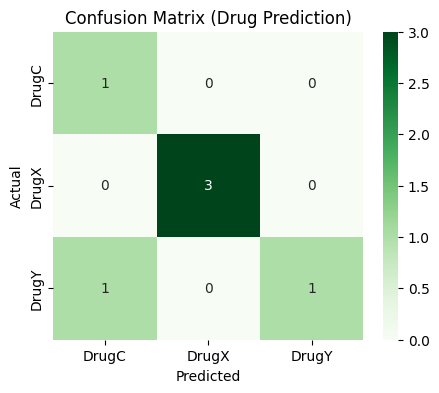

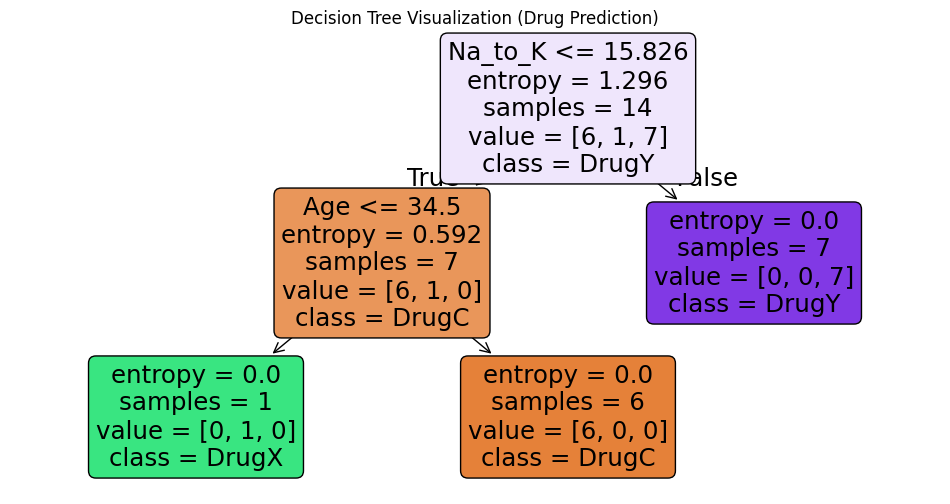

In [5]:
# Decision Tree Algorithm for Drug Recommendation
# Dataset: drug_data.csv

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Load Dataset ----------------
data = pd.read_csv("drug_data.csv")

# Encode categorical columns
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

data['Sex'] = le_sex.fit_transform(data['Sex'])
data['BP'] = le_bp.fit_transform(data['BP'])
data['Cholesterol'] = le_chol.fit_transform(data['Cholesterol'])
data['Drug'] = le_drug.fit_transform(data['Drug'])

# Features and Target
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ---------------- Decision Tree Model ----------------
model = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
model.fit(X_train, y_train)

# ---------------- Predictions ----------------
y_pred = model.predict(X_test)

# ---------------- Evaluation ----------------
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {accuracy:.4f}")
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le_drug.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.title("Confusion Matrix (Drug Prediction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------- Decision Tree Visualization ----------------
plt.figure(figsize=(12,6))
plot_tree(model,
          feature_names=['Age','Sex','BP','Cholesterol','Na_to_K'],
          class_names=le_drug.classes_,
          filled=True, rounded=True)
plt.title("Decision Tree Visualization (Drug Prediction)")
plt.show()